## Clasificación de Hongos

#### Funciones

In [431]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score


In [432]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Función para graficar distribución
def GraficarDistribucionPlotly(dataframe, filas_columnas, alto, ancho, nbinsx=10):
    fig = make_subplots(rows=filas_columnas, cols=filas_columnas, subplot_titles=dataframe.columns)

    for i, col in enumerate(dataframe.columns):
        ax = i//filas_columnas + 1
        ay = i%filas_columnas + 1
        fig.add_trace(go.Histogram(x=dataframe[col], nbinsx=nbinsx, name=col), ax, ay)
        
    fig.update_layout(title='Histogramas de cada columna', height=alto, width=ancho, showlegend=False)
    
    return fig.show()

# Función para crear un mapa de calor
def MapaCalor(dataframe, alto, ancho):
    fig = go.Figure(data=go.Heatmap(z=dataframe.corr(), x=dataframe.columns, y=dataframe.columns))
    fig.update_layout(title='Mapa de calor', height=alto, width=ancho)
    return fig.show()

# Función de codificación por frecuencias
def codificar_por_frecuencia(df):
    # Obtener el número total de instancias
    total_instancias = df.shape[0]

    # Iterar sobre cada columna del dataframe
    for columna in df.columns:
        # Calcular la frecuencia de cada valor en la columna
        frecuencias = df[columna].value_counts(normalize=True)

        # Reemplazar cada valor por su frecuencia
        df[columna] = df[columna].map(frecuencias)

    return df

# Imputación moda por clase
def ImputacionModaporClase(df, clase_col, imputar_col):
    mode_by_class = df.groupby(clase_col)[imputar_col].agg(lambda x: pd.Series.mode(x)[0])
    print(mode_by_class)

    # Usar 'apply' para imputar la moda por clase
    df[imputar_col] = df.apply(
        lambda row: mode_by_class[row[clase_col]] if pd.isnull(row[imputar_col]) else row[imputar_col],
        axis=1
    )

    return df



#### Análisis del Dataset

In [433]:
df = pd.read_csv("agaricus-lepiota.data")

# Definir la lista de nuevos nombres de columnas
column_names = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing',
                'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'ssar', 'ssbr', 'scar', 'scbr', 'veil-type',
                'veil-color', 'ring-number', 'ring-type', 'spore-p-color', 'population', 'habitat']

# Asignar los nuevos nombres de columnas al dataframe
df.columns = column_names

# Obtener el número de atributos y el número de instancias
instancias, atributos = df.shape

print('Atributos: ', atributos)
print('Instancias: ', instancias)
df

Atributos:  23
Instancias:  8123


class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        e         x           s         y       t    a               f   
1        e         b           s         w       t    l               f   
2        p         x           y         w       t    p               f   
3        e         x           s         g       f    n               f   
4        e         x           y         y       t    a               f   
...    ...       ...         ...       ...     ...  ...             ...   
8118     e         k           s         n       f    n               a   
8119     e         x           s         n       f    n               a   
8120     e         f           s         n       f    n               a   
8121     p         k           y         n       f    y               f   
8122     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... ssbr scar scbr veil-type  \
0               c         b          k  ...    s    w    w         p   
1               c         b          n  ...    s    w    w         p   
2               c         n          n  ...    s    w    w         p   
3               w         b          k  ...    s    w    w         p   
4               c         b          n  ...    s    w    w         p   
...           ...       ...        ...  ...  ...  ...  ...       ...   
8118            c         b          y  ...    s    o    o         p   
8119            c         b          y  ...    s    o    o         p   
8120            c         b          n  ...    s    o    o         p   
8121            c         n          b  ...    k    w    w         p   
8122            c         b          y  ...    s    o    o         p   

     veil-color ring-number ring-type spore-p-color population habitat  
0             w           o         p             n          n       g  
1             w           o         p             n          n       m  
2             w           o         p             k          s       u  
3             w           o         e             n          a       g  
4             w           o         p             k          n       g  
...         ...         ...       ...           ...        ...     ...  
8118          o           o         p             b          c       l  
8119          n           o         p             b          v       l  
8120          o           o         p             b          c       l  
8121          w           o         e             w          v       l  
8122          o           o         p             o          c       l  

[8123 rows x 23 columns]

Valores únicos por atributo

In [434]:
for columna in df.columns:
    valores_unicos = df[columna].unique()
    print(f"Valores únicos en la columna '{columna}':", valores_unicos)
    print()

Valores únicos en la columna 'class': ['e' 'p']

Valores únicos en la columna 'cap-shape': ['x' 'b' 's' 'f' 'k' 'c']

Valores únicos en la columna 'cap-surface': ['s' 'y' 'f' 'g']

Valores únicos en la columna 'cap-color': ['y' 'w' 'g' 'n' 'e' 'p' 'b' 'u' 'c' 'r']

Valores únicos en la columna 'bruises': ['t' 'f']

Valores únicos en la columna 'odor': ['a' 'l' 'p' 'n' 'f' 'c' 'y' 's' 'm']

Valores únicos en la columna 'gill-attachment': ['f' 'a']

Valores únicos en la columna 'gill-spacing': ['c' 'w']

Valores únicos en la columna 'gill-size': ['b' 'n']

Valores únicos en la columna 'gill-color': ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']

Valores únicos en la columna 'stalk-shape': ['e' 't']

Valores únicos en la columna 'stalk-root': ['c' 'e' 'b' 'r' '?']

Valores únicos en la columna 'ssar': ['s' 'f' 'k' 'y']

Valores únicos en la columna 'ssbr': ['s' 'f' 'y' 'k']

Valores únicos en la columna 'scar': ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']

Valores únicos en la columna 'scbr':

Se puede observar que en la columna 'stalk-root' hay signos '?' lo que en la documentación del dataset indican que son valores nulos, por lo que suplen por NaN

In [435]:
# Reemplazar los signos "?" por NaN en todo el DataFrame
df.replace("?", np.nan, inplace=True)

Revisar cantidad de valores nulos

In [436]:
# Valores nulos por columna
df.isnull().sum()

class                 0
cap-shape             0
cap-surface           0
cap-color             0
bruises               0
odor                  0
gill-attachment       0
gill-spacing          0
gill-size             0
gill-color            0
stalk-shape           0
stalk-root         2480
ssar                  0
ssbr                  0
scar                  0
scbr                  0
veil-type             0
veil-color            0
ring-number           0
ring-type             0
spore-p-color         0
population            0
habitat               0
dtype: int64

Distribución de los datos

In [437]:
filas_columnas = 5
alto = 700
ancho = 1000
GraficarDistribucionPlotly(df, filas_columnas, alto, ancho, 15)

#### Imputación y codificación

Se realiza la imputación de moda por clase para los datos del atributo 'stalk-root'

In [438]:
df_new = ImputacionModaporClase(df, 'class', 'stalk-root')
df_new.isnull().sum()

class
e    b
p    b
Name: stalk-root, dtype: object


class              0
cap-shape          0
cap-surface        0
cap-color          0
bruises            0
odor               0
gill-attachment    0
gill-spacing       0
gill-size          0
gill-color         0
stalk-shape        0
stalk-root         0
ssar               0
ssbr               0
scar               0
scbr               0
veil-type          0
veil-color         0
ring-number        0
ring-type          0
spore-p-color      0
population         0
habitat            0
dtype: int64

In [439]:
GraficarDistribucionPlotly(df_new, filas_columnas, alto, ancho, 15)

Debido a que todos los datos son categóricos y se desea realizar una clasificación, se procede a codificarlos. Se codificarán por frecuencia de aparición

In [440]:
# Codificar la clase por frecuencia
df_cod = codificar_por_frecuencia(df_new.iloc[:,1:].copy())

# Reemplazar 'e' y 'p' en la columna 'class' con 0 y 1 respectivamente
labels_encoded = df_new['class'].replace({'e': 0, 'p': 1})

# Insertar las etiquetas codificadas en la primera posición de df_cod
df_cod.insert(0, 'class', labels_encoded)
df_cod

class  cap-shape  cap-surface  cap-color   bruises      odor  \
0         0   0.449957     0.314539   0.131971  0.415487  0.049243   
1         0   0.055644     0.314539   0.128032  0.415487  0.049243   
2         1   0.449957     0.399360   0.128032  0.415487  0.031392   
3         0   0.449957     0.314539   0.226517  0.584513  0.434322   
4         0   0.449957     0.399360   0.131971  0.415487  0.049243   
...     ...        ...          ...        ...       ...       ...   
8118      0   0.101933     0.314539   0.281054  0.584513  0.434322   
8119      0   0.449957     0.314539   0.281054  0.584513  0.434322   
8120      0   0.388034     0.314539   0.281054  0.584513  0.434322   
8121      1   0.101933     0.399360   0.281054  0.584513  0.070910   
8122      0   0.449957     0.314539   0.281054  0.584513  0.434322   

      gill-attachment  gill-spacing  gill-size  gill-color  ...      ssbr  \
0            0.974147      0.838483   0.690878    0.050105  ...  0.607534   
1            0.974147      0.838483   0.690878    0.129016  ...  0.607534   
2            0.974147      0.838483   0.309122    0.129016  ...  0.607534   
3            0.974147      0.161517   0.690878    0.050105  ...  0.607534   
4            0.974147      0.838483   0.690878    0.129016  ...  0.607534   
...               ...           ...        ...         ...  ...       ...   
8118         0.025853      0.838483   0.690878    0.010587  ...  0.607534   
8119         0.025853      0.838483   0.690878    0.010587  ...  0.607534   
8120         0.025853      0.838483   0.690878    0.129016  ...  0.607534   
8121         0.974147      0.838483   0.309122    0.212729  ...  0.283639   
8122         0.025853      0.838483   0.690878    0.010587  ...  0.607534   

          scar      scbr  veil-type  veil-color  ring-number  ring-type  \
0     0.549428  0.539579        1.0    0.975379     0.921704   0.488366   
1     0.549428  0.539579        1.0    0.975379     0.921704   0.488366   
2     0.549428  0.539579        1.0    0.975379     0.921704   0.488366   
3     0.549428  0.539579        1.0    0.975379     0.921704   0.341746   
4     0.549428  0.539579        1.0    0.975379     0.921704   0.488366   
...        ...       ...        ...         ...          ...        ...   
8118  0.023637  0.023637        1.0    0.011818     0.921704   0.488366   
8119  0.023637  0.023637        1.0    0.011818     0.921704   0.488366   
8120  0.023637  0.023637        1.0    0.011818     0.921704   0.488366   
8121  0.549428  0.539579        1.0    0.975379     0.921704   0.341746   
8122  0.023637  0.023637        1.0    0.011818     0.921704   0.488366   

      spore-p-color  population   habitat  
0          0.242275    0.049243  0.264434  
1          0.242275    0.049243  0.035947  
2          0.230334    0.153515  0.045180  
3          0.242275    0.047273  0.264434  
4          0.230334    0.049243  0.264434  
...             ...         ...       ...  
8118       0.005909    0.041856  0.102425  
8119       0.005909    0.497353  0.102425  
8120       0.005909    0.041856  0.102425  
8121       0.293980    0.497353  0.102425  
8122       0.005909    0.041856  0.102425  

[8123 rows x 23 columns]

#### Clasificación con KNN

##### Holdout Validation (80-20)

In [441]:
test_size = 0.2
random_state = None

# Atributos y clase
X = df_cod.iloc[:,1:]
y = df_new.iloc[:,0]

# Dividir datos en entrenamiento y test (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)


In [442]:
k = 5
# Crear clasificador KNN
knn = KNeighborsClassifier(n_neighbors=k)

# Entrenar el clasificador
knn.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = knn.predict(X_test)

# Calcular la precisión del clasificador
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
recall_metric = recall_score(y_test, y_pred, average='macro')

print("Precisión del clasificador KNN:", accuracy)
print("F1 score del clasificador KNN:", f1)
print("Recall del clasificador KNN:", recall_metric)

Precisión del clasificador KNN: 1.0
F1 score del clasificador KNN: 1.0
Recall del clasificador KNN: 1.0


##### Random Subsampling Validation

In [443]:
# Convertir a matrices numpy si tus datos son DataFrames de pandas
X = X.values if hasattr(X, 'values') else X
y = y.values if hasattr(y, 'values') else y

# Establecer la cantidad de iteraciones y el tamaño del test set
num_iterations = 50
test_size = 0.2
test_size_index = int(test_size * len(X))

# Inicializar listas para almacenar las puntuaciones y porcentaje de datos repetidos de cada iteración
scores_accuracy = []
scores_f1 = []
scores_recall = []
repeated_data_percentages = []

np.random.seed(0)  # para obtener resultados reproducibles

for i in range(num_iterations):
    # Muestreo aleatorio con repetición para los índices de prueba
    test_indices = np.random.choice(len(X), size=test_size_index, replace=True)
    # Muestreo aleatorio con repetición para los índices de entrenamiento
    train_indices = np.random.choice(len(X), size=len(X)-test_size_index, replace=True)

    # Calcular el porcentaje de datos repetidos
    repeated_data = len(set(test_indices) & set(train_indices))
    repeated_data_percentage = (repeated_data / len(X)) * 100
    repeated_data_percentages.append(repeated_data_percentage)

    # Crear conjuntos de entrenamiento y prueba
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    # Crear y entrenar el clasificador
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)

    # Predecir los valores para el conjunto de prueba
    y_pred = knn.predict(X_test)

    # Calcular las métricas y almacenarlas
    scores_accuracy.append(accuracy_score(y_test, y_pred))
    scores_f1.append(f1_score(y_test, y_pred, average='macro'))
    scores_recall.append(recall_score(y_test, y_pred, average='macro'))

# Calcular las medias de las métricas
average_accuracy = np.mean(scores_accuracy)
average_f1 = np.mean(scores_f1)
average_recall = np.mean(scores_recall)
average_repeated_data = np.mean(repeated_data_percentages)
print(f'La precisión media tras {num_iterations} iteraciones es {average_accuracy}')
print(f'El F1-score medio tras {num_iterations} iteraciones es {average_f1}')
print(f'El recall medio tras {num_iterations} iteraciones es {average_recall}')


La precisión media tras 50 iteraciones es 0.999963054187192
El F1-score medio tras 50 iteraciones es 0.9999629665524574
El recall medio tras 50 iteraciones es 0.9999612403100775


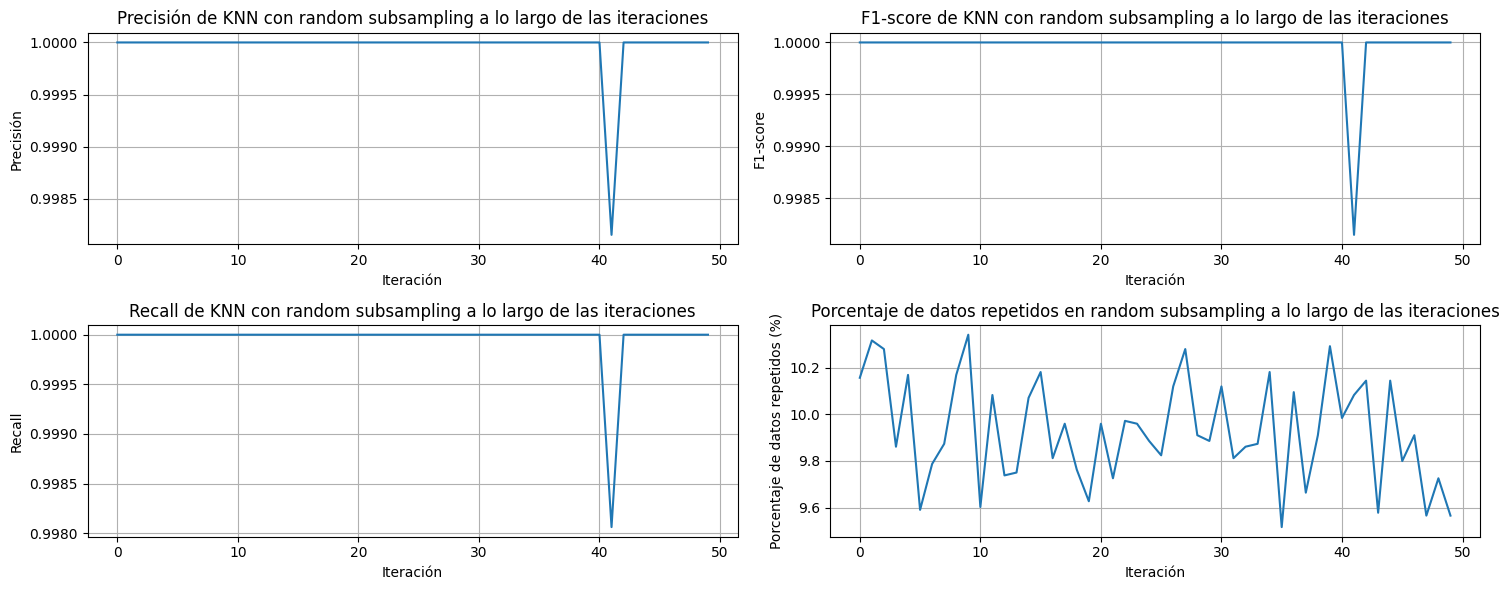

In [444]:
import matplotlib.pyplot as plt
# Graficar las puntuaciones
fig, axs = plt.subplots(2, 2, figsize=(15,6))

# Precisión
axs[0, 0].plot(scores_accuracy)
axs[0, 0].set_title('Precisión de KNN con random subsampling a lo largo de las iteraciones')
axs[0, 0].set_xlabel('Iteración')
axs[0, 0].set_ylabel('Precisión')
axs[0, 0].grid(True)

# F1-score
axs[0, 1].plot(scores_f1)
axs[0, 1].set_title('F1-score de KNN con random subsampling a lo largo de las iteraciones')
axs[0, 1].set_xlabel('Iteración')
axs[0, 1].set_ylabel('F1-score')
axs[0, 1].grid(True)

# Recall
axs[1, 0].plot(scores_recall)
axs[1, 0].set_title('Recall de KNN con random subsampling a lo largo de las iteraciones')
axs[1, 0].set_xlabel('Iteración')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].grid(True)

# Porcentaje de datos repetidos
axs[1, 1].plot(repeated_data_percentages)
axs[1, 1].set_title('Porcentaje de datos repetidos en random subsampling a lo largo de las iteraciones')
axs[1, 1].set_xlabel('Iteración')
axs[1, 1].set_ylabel('Porcentaje de datos repetidos (%)')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()


#### Clasificación con red neuronal

##### Holdout Validation

In [445]:
import torch
from torch import nn

device = torch.device("cpu")

net = torch.nn.Sequential(
    nn.Linear(22, 150),
    nn.ReLU(),
    nn.Linear(150, 100),
    nn.ReLU(),
    nn.Linear(100, 2)
)

In [446]:
from torch.utils.data import Dataset, DataLoader

# Parámetros de división de los datos
test_size = 0.2
random_state = None

# Atributos y clase
X = df_cod.iloc[:,1:]
y = df_cod.iloc[:,0]
print(X.shape, y.shape)

# Convertir a tensores de PyTorch
X = torch.FloatTensor(X.values)
y = torch.LongTensor(y.values)

# Dividir datos en entrenamiento y test (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(8123, 22) (8123,)
torch.Size([6498, 22]) torch.Size([1625, 22]) torch.Size([6498]) torch.Size([1625])


In [447]:
# Importar DataLoader de PyTorch
from torch.utils.data import DataLoader

# Definir el criterio y el optimizador
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters())

# Definir tamaño del lote
batch_size = 32

# Crear DataLoader para los datos de entrenamiento
train_data = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

# Número de épocas
num_epochs = 100

# Bucle de entrenamiento
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        
        # Mover los tensores al dispositivo correcto
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        # Pasada hacia adelante
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        
        # Pasada hacia atrás y paso de optimización
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    # Imprimir la pérdida cada 10 épocas
    if (epoch+1) % 10 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))




Epoch [10/100], Loss: 0.0000
Epoch [20/100], Loss: 0.0005
Epoch [30/100], Loss: 0.0000
Epoch [40/100], Loss: 0.0000
Epoch [50/100], Loss: 0.0000
Epoch [60/100], Loss: 0.0000
Epoch [70/100], Loss: 0.0000
Epoch [80/100], Loss: 0.0000
Epoch [90/100], Loss: 0.0000
Epoch [100/100], Loss: 0.0000


In [448]:
# Prueba el modelo
net.eval()
with torch.no_grad():
    correct = 0
    total = 0
    outputs = net(X_test.to(device))
    _, predicted = torch.max(outputs.data, 1)
    total += y_test.size(0)
    correct += (predicted.cpu() == y_test).sum().item()

    accuracy = correct / total
    f1 = f1_score(y_test, predicted.cpu(), average='macro')
    recall_metric = recall_score(y_test, predicted.cpu(), average='macro')

    print("Precisión del clasificador de red neuronal:", accuracy)
    print("F1 score del clasificador de red neuronal:", f1)
    print("Recall del clasificador de red neuronal:", recall_metric)


Precisión del clasificador de red neuronal: 1.0
F1 score del clasificador de red neuronal: 1.0
Recall del clasificador de red neuronal: 1.0


##### Random Subsampling

In [449]:
# Atributos y clase
X = df_cod.iloc[:,1:]
y = df_cod.iloc[:,0]
# Convertir a matrices numpy si tus datos son DataFrames de pandas
X = X.values if hasattr(X, 'values') else X
y = y.values if hasattr(y, 'values') else y

# Establecer la cantidad de iteraciones y el tamaño del test set
num_iterations = 50
# test_size = 0.2
# test_size_index = int(test_size * len(X))

# Inicializar listas para almacenar las puntuaciones y porcentaje de datos repetidos de cada iteración
scores_accuracy = []
scores_f1 = []
scores_recall = []
repeated_data_percentages = []

np.random.seed(0)  # para obtener resultados reproducibles

for i in range(num_iterations):
    # Muestreo aleatorio con repetición para los índices de prueba
    test_indices = np.random.choice(len(X), size=test_size_index, replace=True)
    # Muestreo aleatorio con repetición para los índices de entrenamiento
    train_indices = np.random.choice(len(X), size=len(X)-test_size_index, replace=True)

    # Calcular el porcentaje de datos repetidos
    repeated_data = len(set(test_indices) & set(train_indices))
    repeated_data_percentage = (repeated_data / len(X)) * 100
    repeated_data_percentages.append(repeated_data_percentage)

    # Crear conjuntos de entrenamiento y prueba
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    # Convertir a tensores de PyTorch y crear DataLoader para los datos de entrenamiento
    X_train = torch.FloatTensor(X_train)
    y_train = torch.LongTensor(y_train)
    train_data = torch.utils.data.TensorDataset(X_train, y_train)
    train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
    
    # Crear y entrenar el clasificador
    net = torch.nn.Sequential(
        nn.Linear(22, 150),
        nn.ReLU(),
        nn.Linear(150, 100),
        nn.ReLU(),
        nn.Linear(100, 2)
    ).to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters())

    # Entrenar la red neuronal
    for epoch in range(num_epochs):
        for i, (inputs, labels) in enumerate(train_loader):
            # Mover los tensores al dispositivo correcto
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            # Pasada hacia adelante
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            
            # Pasada hacia atrás y paso de optimización
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Predecir los valores para el conjunto de prueba
    inputs = torch.from_numpy(X_test).float().to(device)
    outputs = net(inputs)
    _, y_pred = torch.max(outputs.data, 1)
    
    # Calcular las métricas y almacenarlas
    scores_accuracy.append(accuracy_score(y_test, y_pred.cpu().numpy()))
    scores_f1.append(f1_score(y_test, y_pred.cpu().numpy(), average='macro'))
    scores_recall.append(recall_score(y_test, y_pred.cpu().numpy(), average='macro'))


La precisión media tras 50 iteraciones es 0.9999137931034483
El F1-score medio tras 50 iteraciones es 0.9999136226408559
El recall medio tras 50 iteraciones es 0.9999103418390848


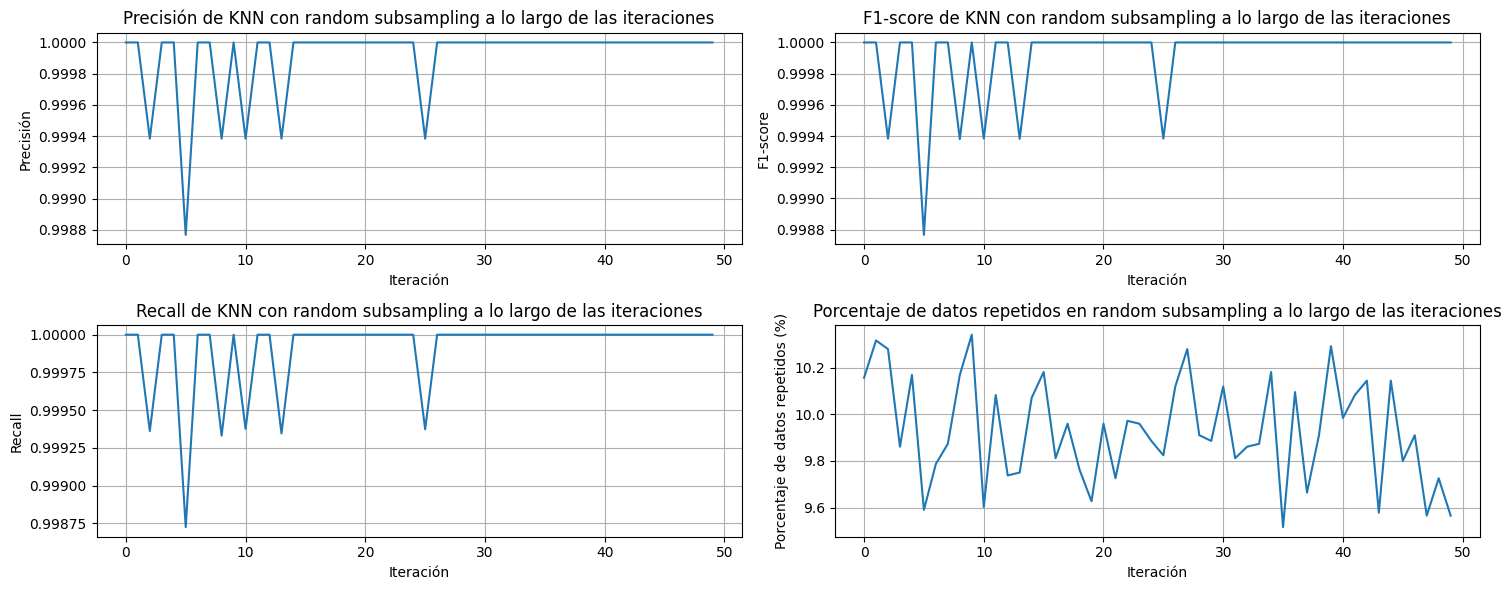

In [452]:
average_accuracy = np.mean(scores_accuracy)
average_f1 = np.mean(scores_f1)
average_recall = np.mean(scores_recall)
print(f'La precisión media tras {num_iterations} iteraciones es {average_accuracy}')
print(f'El F1-score medio tras {num_iterations} iteraciones es {average_f1}')
print(f'El recall medio tras {num_iterations} iteraciones es {average_recall}')
# Graficar las puntuaciones
fig, axs = plt.subplots(2, 2, figsize=(15,6))

# Precisión
axs[0, 0].plot(scores_accuracy)
axs[0, 0].set_title('Precisión de KNN con random subsampling a lo largo de las iteraciones')
axs[0, 0].set_xlabel('Iteración')
axs[0, 0].set_ylabel('Precisión')
axs[0, 0].grid(True)

# F1-score
axs[0, 1].plot(scores_f1)
axs[0, 1].set_title('F1-score de KNN con random subsampling a lo largo de las iteraciones')
axs[0, 1].set_xlabel('Iteración')
axs[0, 1].set_ylabel('F1-score')
axs[0, 1].grid(True)

# Recall
axs[1, 0].plot(scores_recall)
axs[1, 0].set_title('Recall de KNN con random subsampling a lo largo de las iteraciones')
axs[1, 0].set_xlabel('Iteración')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].grid(True)

# Porcentaje de datos repetidos
axs[1, 1].plot(repeated_data_percentages)
axs[1, 1].set_title('Porcentaje de datos repetidos en random subsampling a lo largo de las iteraciones')
axs[1, 1].set_xlabel('Iteración')
axs[1, 1].set_ylabel('Porcentaje de datos repetidos (%)')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()